In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [9]:
#preprocessing
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df['RiskLevel'].replace({"high risk": "2", "mid risk": "1", "low risk" : "0"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)

# df without duplicates
df1 = df.drop_duplicates()
from sklearn.model_selection import train_test_split
X_values = df1.drop('RiskLevel', axis=1)
y_values = df1['RiskLevel']

# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)

X_train,X_test,y_train,y_test = train_test_split(X_values,y_values,
                                                 test_size=0.25,random_state= 42)
X_train.shape,X_test.shape, y_train.shape


((339, 6), (113, 6), (339,))

In [10]:
# Modelling
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape = [6], activation='relu'),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               1792      
                                                                 
 dense_7 (Dense)             (None, 126)               32382     
                                                                 
 dense_8 (Dense)             (None, 3)                 381       
                                                                 
Total params: 34,555
Trainable params: 34,555
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
11/11 [==============================] - 4s 74ms/step - loss: 1.0224 - accuracy: 0.5280 - val_loss: 1.0348 - val_accuracy: 0.4867
Epoch 2/500
11/11 [==============================] - 0s 15ms/step - loss: 0.9460 - accuracy: 0.5870 - val_loss: 0.9762 - val_accuracy: 0.5929
Epoch 3/500
11/11 [==============================] - 0s 11ms/step - loss: 0.8849 - accuracy: 0.6578 - val_loss: 0.9177 - val_accuracy: 0.5752
Epoch 4/500
11/11 [==============================] - 0s 12ms/step - loss: 0.8287 - accuracy: 0.6578 - val_loss: 0.8817 - val_accuracy: 0.5929
Epoch 5/500
11/11 [==============================] - 0s 12ms/step - loss: 0.7959 - accuracy: 0.6667 - val_loss: 0.8662 - val_accuracy: 0.5929
Epoch 6/500
11/11 [==============================] - 0s 12ms/step - loss: 0.7778 - accuracy: 0.6726 - val_loss: 0.8507 - val_accuracy: 0.6195
Epoch 7/500
11/11 [==============================] - 0s 11ms/step - loss: 0.7632 - accuracy: 0.6726 - val_loss: 0.8345 - val_accuracy: 0.6106
Epoch 

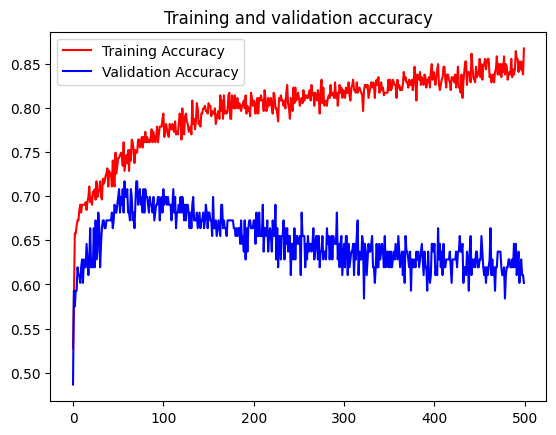

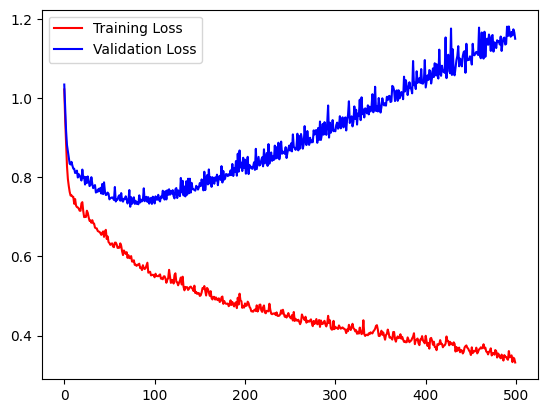

In [12]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label ="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               1792      
                                                                 
 dense_7 (Dense)             (None, 126)               32382     
                                                                 
 dense_8 (Dense)             (None, 3)                 381       
                                                                 
Total params: 34,555
Trainable params: 34,555
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
11/11 [==============================] - 2s 61ms/step - loss: 0.3863 - accuracy: 0.8201 - val_loss: 1.2546 - val_accuracy: 0.6283
Epoch 2/500
11/11 [==============================] - 0s 35ms/step - loss: 0.3615 - accuracy: 0.8378 - val_loss: 1.1608 - val_accuracy: 0.6018
Epoch 3/500
11/11 [======

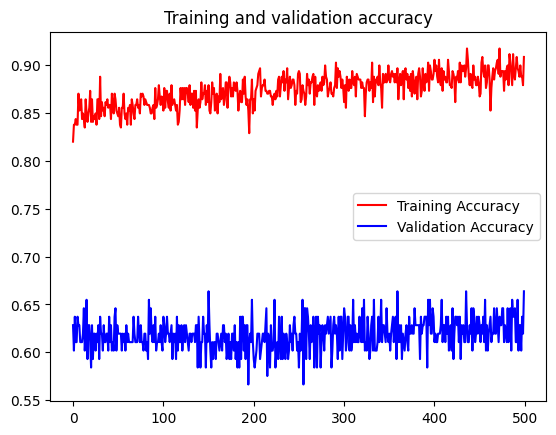

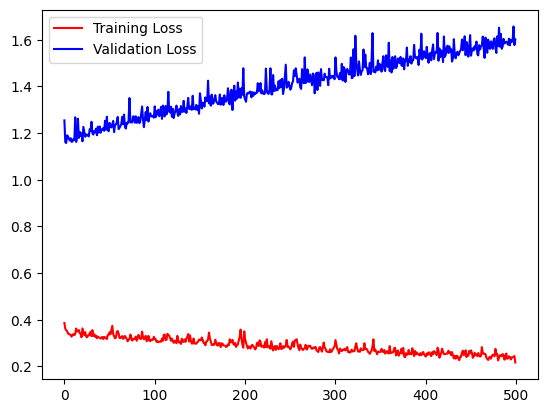

In [13]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=[None, 6]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label ="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()
plt.show()